In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('royalties_cleaned.csv')
df['Sales Date'] = df['Sales Date'].astype('datetime64[ns]')

df.round(5).head()

,Sales Date,Quantity,Price,Subtotal,Album Name,Track Name,Partner Name,Transaction Type,Delivery Country
0,2017-08-15,7,0.00077,0.00541,Album_1,Track_1_1,Pandora,Stream,US
1,2017-08-15,1,0.00077,0.00077,Album_1,Track_1_2,Pandora,Stream,US
2,2017-08-15,2,0.00077,0.00155,Album_1,Track_1_3,Pandora,Stream,US
3,2017-08-15,40,0.00077,0.03094,Album_1,Track_1_4,Pandora,Stream,US
4,2017-08-15,36,0.00077,0.02785,Album_1,Track_1_5,Pandora,Stream,US


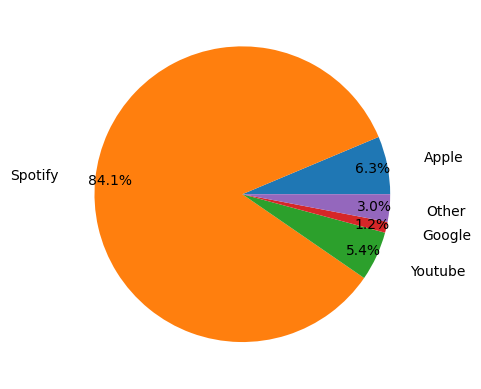

In [3]:
# Pie Chart
partners = df['Partner Name'].unique()

plays = []
for partner in partners:
    plays.append(sum(df[df['Partner Name'] == partner].Quantity))
    
plays.sort(reverse=True)
thresh = plays[3] # get top four services

plays_dict = {}
for partner in partners:
    cur_plays = sum(df[df['Partner Name'] == partner].Quantity)
    if cur_plays >= thresh:
        plays_dict[partner] = cur_plays

# Creat "other" category
rest = sum(plays[4:])
plays_dict['Other'] = rest

plt.pie(plays_dict.values(), labels=plays_dict.keys(), autopct='%1.1f%%',
       pctdistance=0.9, labeldistance=1.25)
plt.show()

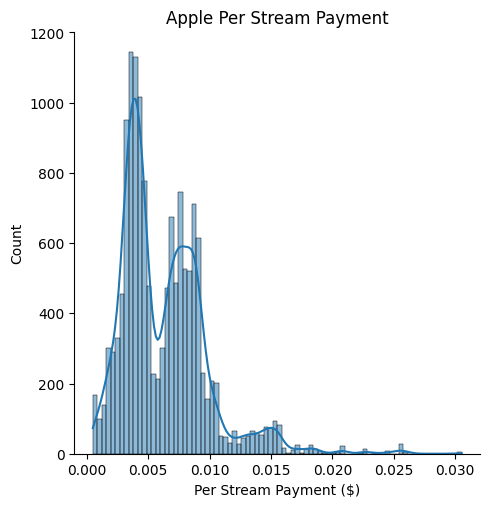

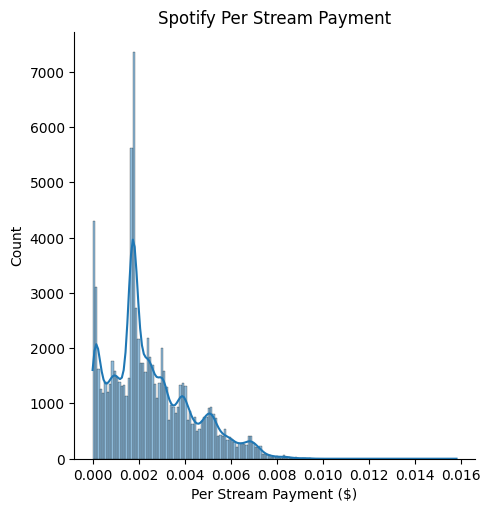

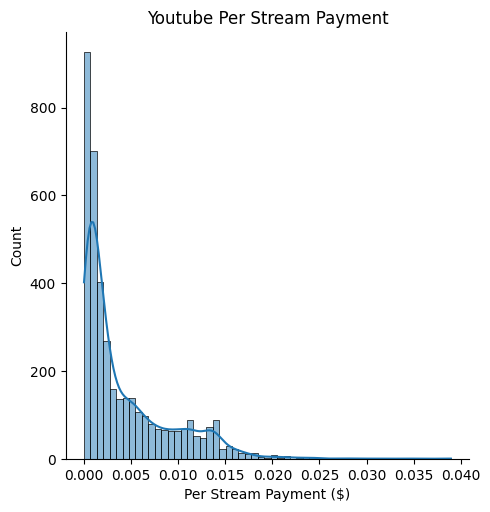

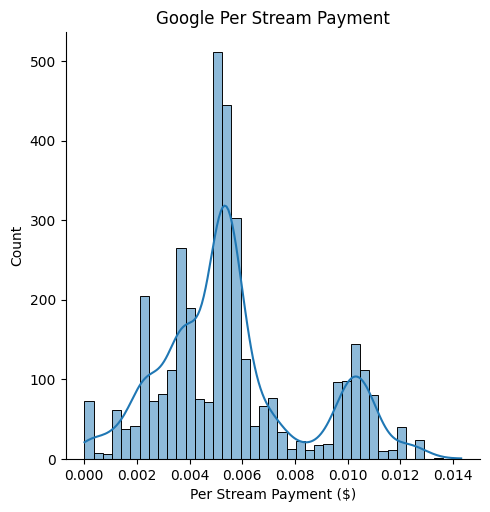

In [4]:
# Histograms of top services
top_partners = list(plays_dict.keys())
top_partners = top_partners[:-1]
top_partners

for partner in top_partners:
    sns.displot(df[df['Partner Name']==partner].Price, kde=True)
    plt.title(partner + ' Per Stream Payment')
    plt.xlabel('Per Stream Payment ($)')
    plt.show()

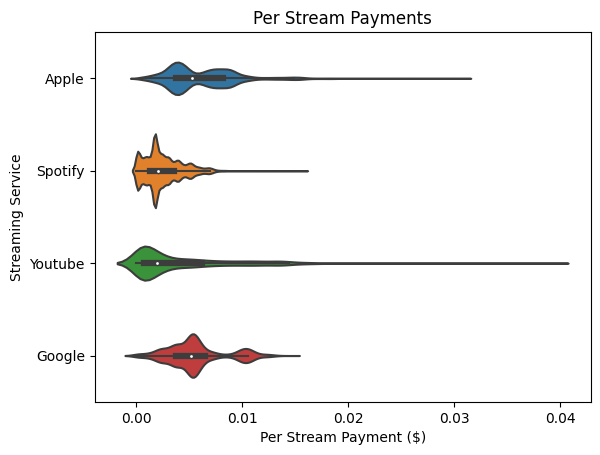

In [5]:
# Violin plots of top services
sns.violinplot(data=df[df['Partner Name'].isin(top_partners)],
               x='Price', y='Partner Name')
plt.title('Per Stream Payments')
plt.xlabel('Per Stream Payment ($)')
plt.ylabel('Streaming Service')
plt.show()

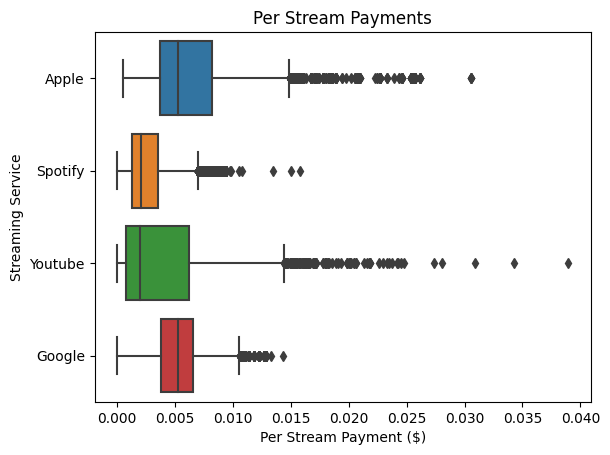

In [6]:
# Box plots of top services
sns.boxplot(data=df[df['Partner Name'].isin(top_partners)],
               x='Price', y='Partner Name')
plt.title('Per Stream Payments')
plt.xlabel('Per Stream Payment ($)')
plt.ylabel('Streaming Service')
plt.show()

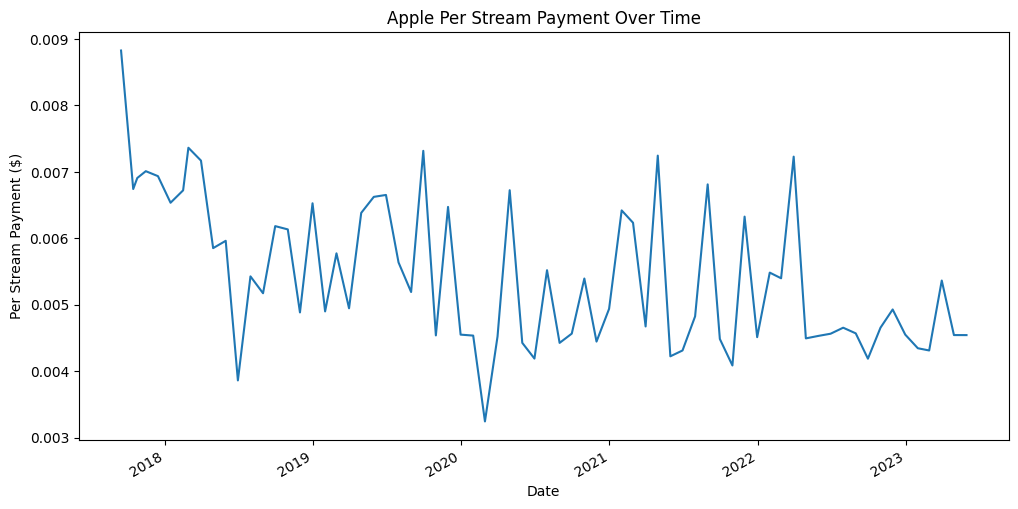

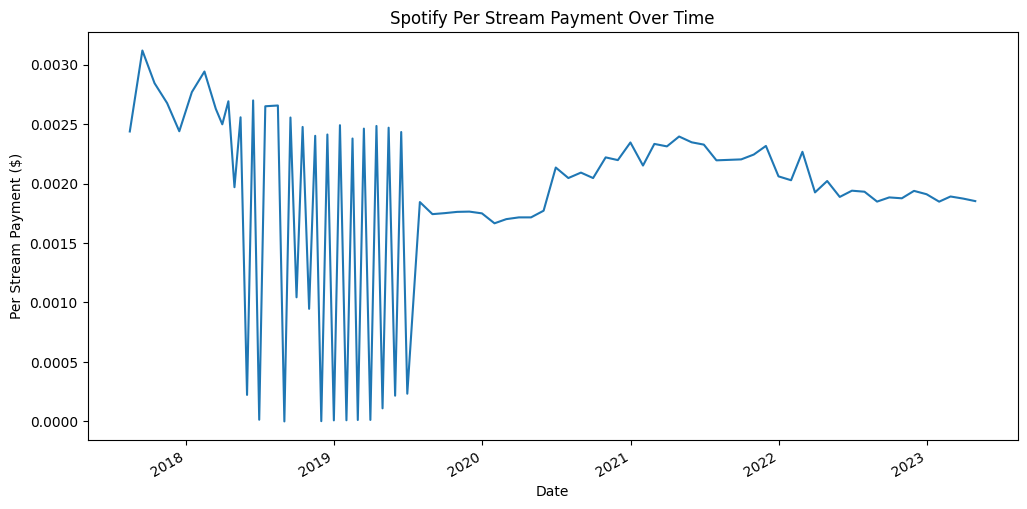

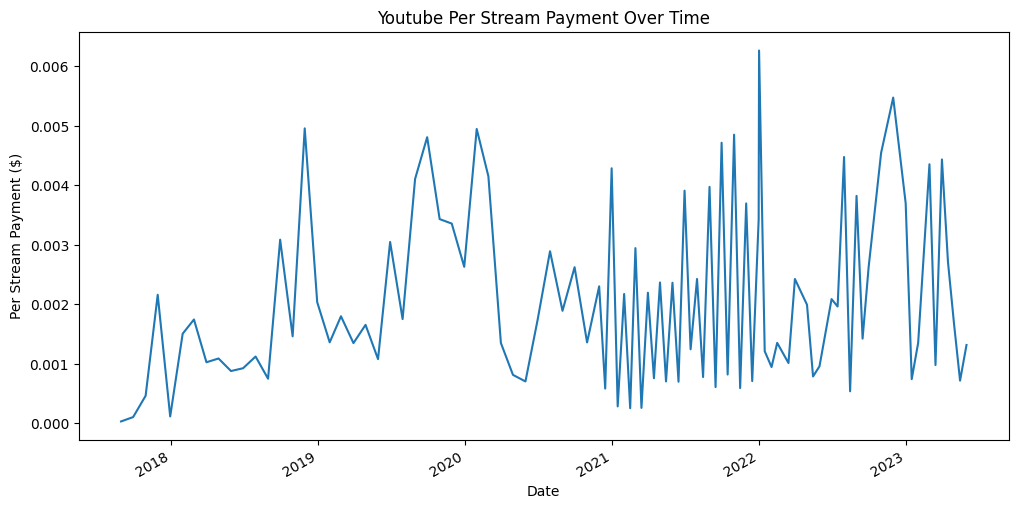

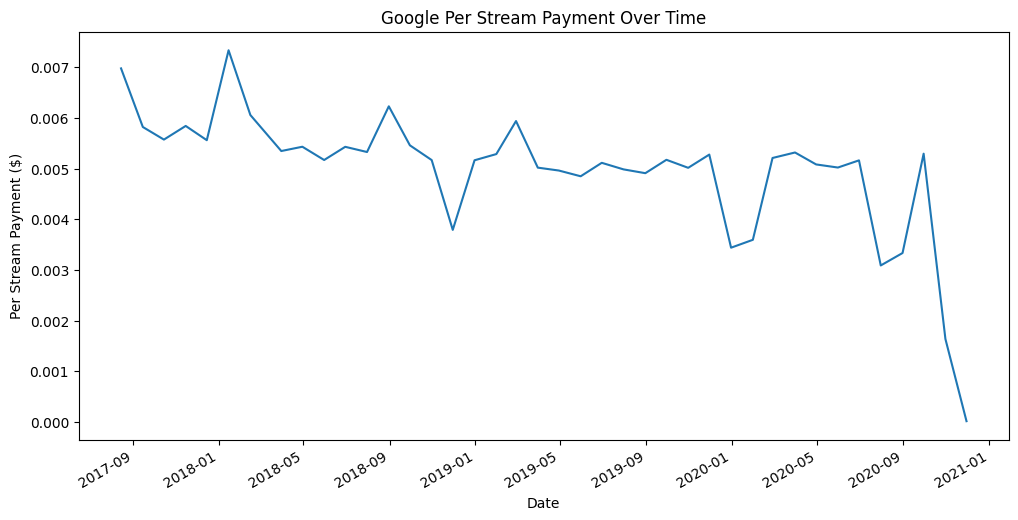

In [7]:
for partner in top_partners:
    cur_df = df[df['Partner Name']==partner]
    plt.figure(figsize=(12, 6))
    cur_df.groupby('Sales Date').Price.median().plot()
    plt.title(partner + ' Per Stream Payment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Per Stream Payment ($)')
    plt.show()

<Axes: xlabel='Sales Date'>

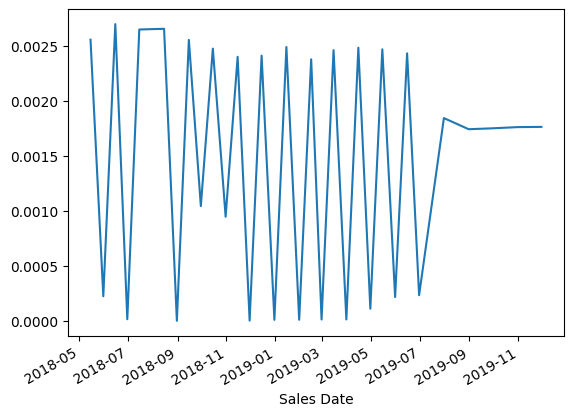

In [60]:
# Explore odd oscillations in spotify data
spotify = df[df['Partner Name']=='Spotify']
x = spotify.groupby('Sales Date').Price.median()
x['5/1/2018':'12/1/2019'].plot()

In [62]:
spotify.set_index('Sales Date', inplace=True)
spotify.index = pd.to_datetime(spotify.index)
spotify = spotify.sort_index()
problem_period = spotify.loc['2018-05-01':'2019-12-01']
problem_period

In [64]:
problem_period.index.unique()

DatetimeIndex(['2018-05-15', '2018-05-31', '2018-06-15', '2018-06-30',
               '2018-07-15', '2018-08-15', '2018-08-31', '2018-09-15',
               '2018-09-30', '2018-10-15', '2018-10-31', '2018-11-15',
               '2018-11-30', '2018-12-15', '2018-12-31', '2019-01-15',
               '2019-01-31', '2019-02-15', '2019-02-28', '2019-03-15',
               '2019-03-31', '2019-04-15', '2019-04-30', '2019-05-15',
               '2019-05-31', '2019-06-15', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30'],
              dtype='datetime64[ns]', name='Sales Date', freq=None)

In [45]:
may15 = problem_period.loc['2018-05-15']
may15

,Quantity,Price,Subtotal,Album Name,Track Name,Partner Name,Transaction Type,Delivery Country
Sales Date,,,,,,,,
2018-05-15,2,0.001978,0.003957,Album_3,Track_3_9,Spotify,Stream,TW
2018-05-15,1,0.001277,0.001277,Album_3,Track_3_9,Spotify,Stream,HU
2018-05-15,1,0.000130,0.000130,Album_3,Track_3_9,Spotify,Stream,CL
2018-05-15,1,0.005433,0.005433,Album_3,Track_3_9,Spotify,Stream,NZ
2018-05-15,1,0.000349,0.000349,Album_3,Track_3_9,Spotify,Stream,ES
...,...,...,...,...,...,...,...,...
2018-05-15,1,0.004670,0.004670,Album_3,Track_3_1,Spotify,Stream,AU
2018-05-15,1,0.002047,0.002047,Album_3,Track_3_1,Spotify,Stream,ID
2018-05-15,2,0.005233,0.010465,Album_3,Track_3_1,Spotify,Stream,DE


In [46]:
may31 = problem_period.loc['2018-05-31']
may31

,Quantity,Price,Subtotal,Album Name,Track Name,Partner Name,Transaction Type,Delivery Country
Sales Date,,,,,,,,
2018-05-31,1,0.002098,0.002098,Album_2,Track_2_5,Spotify,Stream,GB
2018-05-31,1,0.000223,0.000223,Album_2,Track_2_1,Spotify,Stream,NL
2018-05-31,3,0.000223,0.000669,Album_3,Track_3_11,Spotify,Stream,NL


In [50]:
print("Plays on May 15: ", sum(may15.Quantity))
print("Plays on May 31: ", sum(may31.Quantity))

Plays in may 15:  9787
Plays in may 31:  5


In [51]:
import numpy as np
print("Median price on May 15: ", round(np.median(may15.Price), 4))
print("Median price on May 31: ", round(np.median(may31.Price), 4))

Mean price in may 15:  0.0026
Mean price in may 31:  0.0002


In [52]:
print("Payout on May 15: ", round(sum(may15.Subtotal), 4))
print("Payout on May 31: ", round(sum(may31.Subtotal), 4))

Payout in may:  36.0082
Payout in June:  0.003


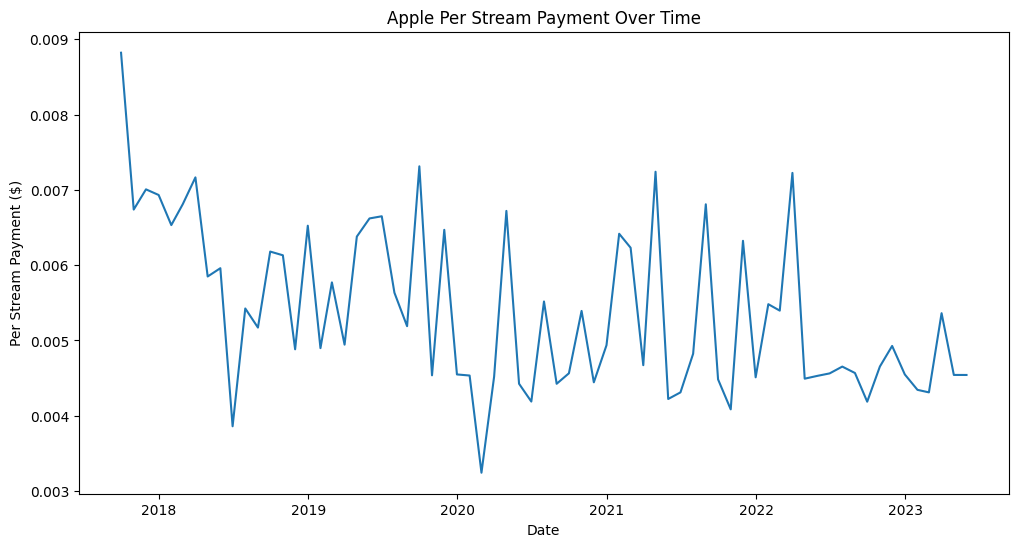

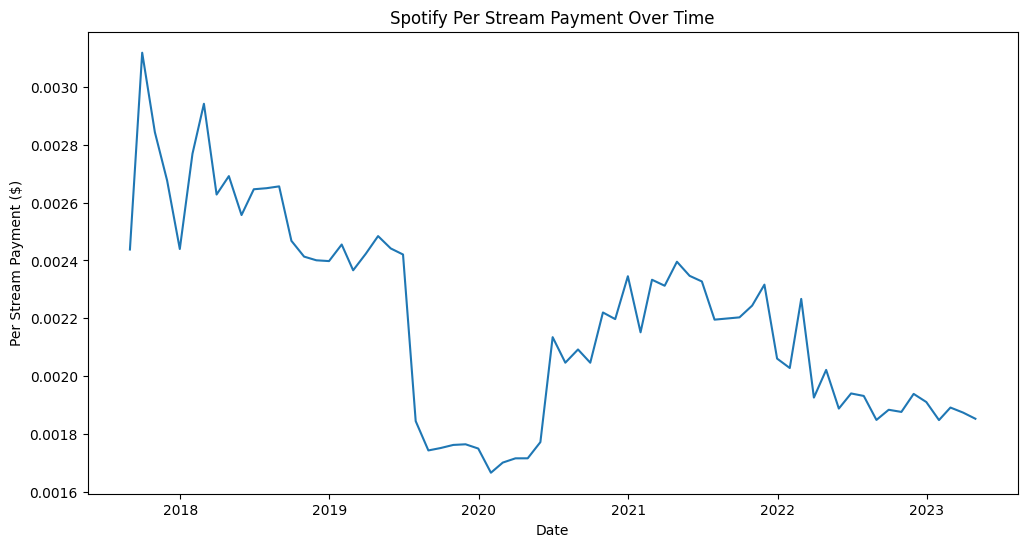

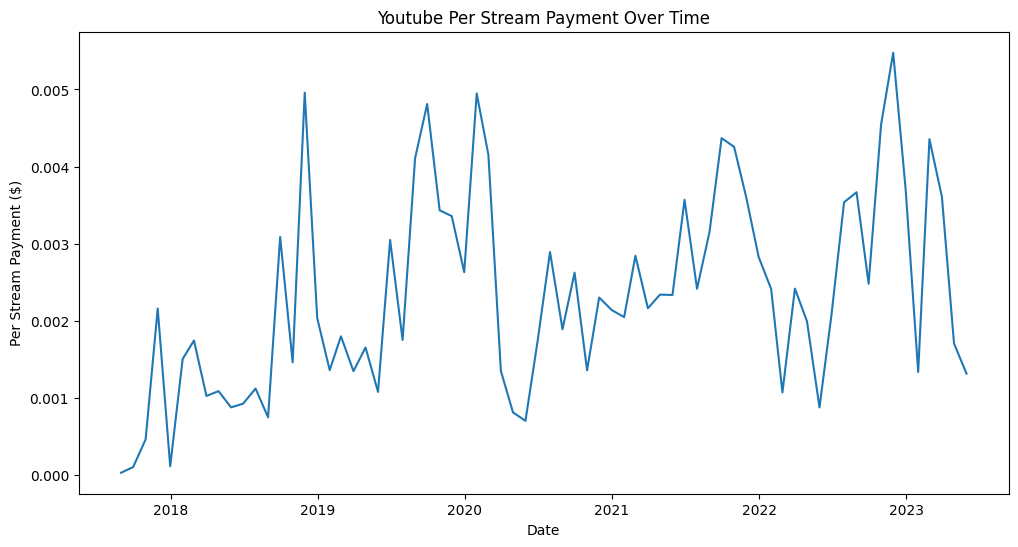

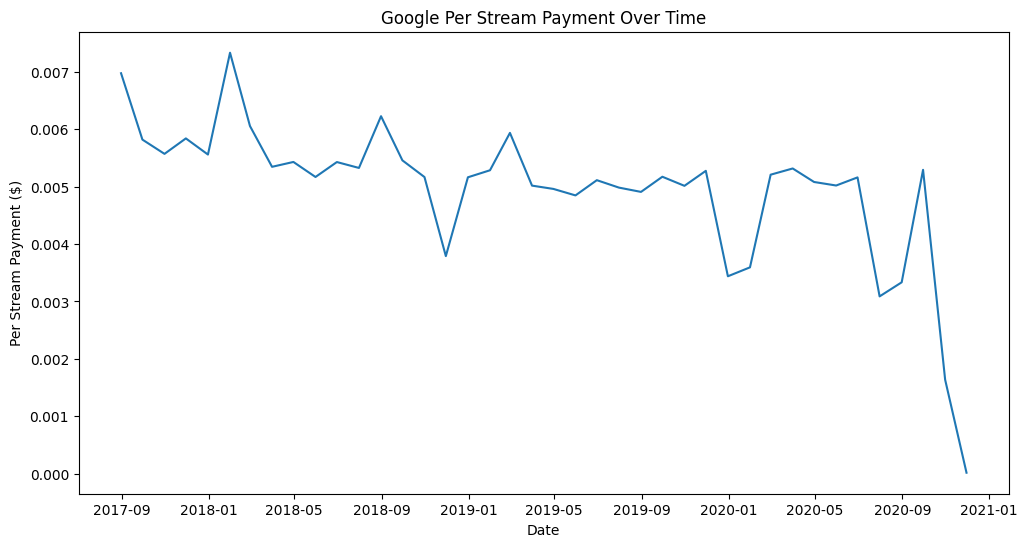

In [73]:
# Resample as monthly then replot the time-series data from above
for partner in top_partners:
    cur_df = df[df['Partner Name']==partner]
    grouped_data = cur_df.groupby(pd.Grouper(freq='M'))
    plt.figure(figsize=(12, 6))
    #grouped_data.Price.median.plot()
    plt.plot(grouped_data.Price.median())
    #cur_df.groupby.Price.median().plot()
    plt.title(partner + ' Per Stream Payment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Per Stream Payment ($)')
    plt.show()